## 3.2.2 Linear regression



###  Create model, compute loss, and optimize the parameters  

1. 所有的层结构和损失函数，都来自torch.nn；因此，所有的模型构建都是从nn.Module继承的。  
2. torch.optim，通过修改参数，使得loss function最小化。  
    一阶优化算法：  
    $$\theta = \theta - \eta * \frac {\partial J(\theta)}{\partial \theta}$$  
    $\eta $ is learning rate. $\frac {\partial J(\theta)}{\partial \theta}$ is the gradient of the function J.  
   We can use torch.optim:   
   e.g optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)   
3. torch.save 
    1. save the constructure of the model and parameters---save model.  
      torch.save(model, './model.pth')
    
    2. save the states of the model.  
      torch.save(model.state_dict(), './model_state.pth'  

4. torch.load
    1. load the constructure of the model and parameters.   
         load_model = torch.load('model.pth')
     
    2. load the states of the model.   
         load_model = model.load_state_dic(torch.load('model_state.pth')
    
 

$$ f(x) = wx + b $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
x = np.array([[2.3],[3.3],[4.4],[5.5],[6.7],[3.1]], dtype=np.float32)
y = np.array([[0.9],[1.7],[2.76],[2.09],[3.19],[1.3]], dtype=np.float32)

# convert numpy to tensor
x = torch.from_numpy(x)
y = torch.from_numpy(y)
print(x)

tensor([[2.3000],
        [3.3000],
        [4.4000],
        [5.5000],
        [6.7000],
        [3.1000]])


In [3]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.Linear = nn.Linear(1, 1)
        
    def forward(self, x):
        output = self.Linear(x)
        return output

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [4]:
critirion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [5]:
from torch.autograd import Variable

for i in range(500):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
    output = model(inputs)
    loss = critirion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
        print('loss is {}'.format(loss.data))

loss is 0.23330770432949066
loss is 0.22418813407421112
loss is 0.22036810219287872
loss is 0.21671104431152344
loss is 0.2132091075181961


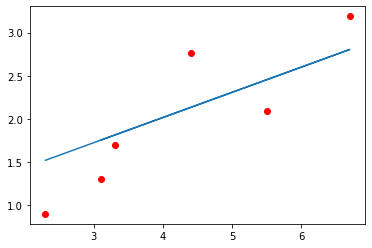

In [6]:
import matplotlib.pyplot as plt

model.eval()
predict = model(Variable(x))
# 将预测值画出来
predict = predict.data.numpy()
plt.plot(x.numpy(), y.numpy(),'ro', label='original data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()

numpy.array 转换成Tensor：torch.from_numpy(x_numpy)   
model.cuda(): 将模型放到GPU上    
每次做反向传播之前，都要做归零梯度：optimizer.zero_grad()  
model.eval(): 将模型变成测试模式； 这是因为有一些层操作，比如dropout 和 BatchNormalization 在 __训练__和 __测试__ 时不一样。  
定义的模型是线性的，所以，在这里，模型预测的值，画出来就是一条直线。


### 多项式回归
$$ y = b + w1*x + w2*x^2 + w3*x^3$$
$$ y = 0.9 + 0.5*x + 3*x^2 + 2.4*x^3$$

In [7]:
# define w, b, x
w = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)     ## unsqueeze(1):将原来的tensor大小由3变成（3，1）。
b = torch.FloatTensor([0.9])

def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, 4)], 1)

In [8]:
# define model
def f(x):
    return x.mm(w) + b

In [9]:
def get_batch(batch_size=32):
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(), Variable(y).cuda()
    else:
        return Variable(x), Variable(y)

In [10]:
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model, self).__init__()
        self.poly = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.poly(x)
        return out

In [11]:
## Compare the f(x) and the class poly_model, then compute the loss
# define the model
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
epoch = 0 
while True:
    batch_x, batch_y = get_batch()
    out = model(batch_x)
    loss = criterion(out, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch += 1
    if (epoch+1)%10000:
        print(loss)
    if loss < 1e-3:
        break



tensor(159.6343, grad_fn=<MseLossBackward>)
tensor(213.7580, grad_fn=<MseLossBackward>)
tensor(36.0517, grad_fn=<MseLossBackward>)
tensor(84.2938, grad_fn=<MseLossBackward>)
tensor(306.5682, grad_fn=<MseLossBackward>)
tensor(51.6447, grad_fn=<MseLossBackward>)
tensor(18.6382, grad_fn=<MseLossBackward>)
tensor(152.0448, grad_fn=<MseLossBackward>)
tensor(91.9688, grad_fn=<MseLossBackward>)
tensor(118.5783, grad_fn=<MseLossBackward>)
tensor(180.0660, grad_fn=<MseLossBackward>)
tensor(256.6991, grad_fn=<MseLossBackward>)
tensor(7.2993, grad_fn=<MseLossBackward>)
tensor(36.4829, grad_fn=<MseLossBackward>)
tensor(10.8944, grad_fn=<MseLossBackward>)
tensor(43.0786, grad_fn=<MseLossBackward>)
tensor(61.8938, grad_fn=<MseLossBackward>)
tensor(1.9989, grad_fn=<MseLossBackward>)
tensor(65.4552, grad_fn=<MseLossBackward>)
tensor(10.6813, grad_fn=<MseLossBackward>)
tensor(48.5046, grad_fn=<MseLossBackward>)
tensor(33.8158, grad_fn=<MseLossBackward>)
tensor(66.9846, grad_fn=<MseLossBackward>)
tensor

tensor(1.0916, grad_fn=<MseLossBackward>)
tensor(0.6503, grad_fn=<MseLossBackward>)
tensor(0.8296, grad_fn=<MseLossBackward>)
tensor(1.4898, grad_fn=<MseLossBackward>)
tensor(0.3234, grad_fn=<MseLossBackward>)
tensor(0.5696, grad_fn=<MseLossBackward>)
tensor(0.4099, grad_fn=<MseLossBackward>)
tensor(0.3317, grad_fn=<MseLossBackward>)
tensor(1.0938, grad_fn=<MseLossBackward>)
tensor(0.2801, grad_fn=<MseLossBackward>)
tensor(0.4341, grad_fn=<MseLossBackward>)
tensor(0.4636, grad_fn=<MseLossBackward>)
tensor(0.5165, grad_fn=<MseLossBackward>)
tensor(0.5796, grad_fn=<MseLossBackward>)
tensor(0.7833, grad_fn=<MseLossBackward>)
tensor(0.7284, grad_fn=<MseLossBackward>)
tensor(0.6249, grad_fn=<MseLossBackward>)
tensor(0.4952, grad_fn=<MseLossBackward>)
tensor(2.3204, grad_fn=<MseLossBackward>)
tensor(0.2327, grad_fn=<MseLossBackward>)
tensor(0.6621, grad_fn=<MseLossBackward>)
tensor(0.5316, grad_fn=<MseLossBackward>)
tensor(0.5426, grad_fn=<MseLossBackward>)
tensor(0.5316, grad_fn=<MseLossBac

tensor(0.0668, grad_fn=<MseLossBackward>)
tensor(0.0476, grad_fn=<MseLossBackward>)
tensor(0.0727, grad_fn=<MseLossBackward>)
tensor(0.0706, grad_fn=<MseLossBackward>)
tensor(0.2335, grad_fn=<MseLossBackward>)
tensor(0.2125, grad_fn=<MseLossBackward>)
tensor(0.0637, grad_fn=<MseLossBackward>)
tensor(0.0493, grad_fn=<MseLossBackward>)
tensor(0.2001, grad_fn=<MseLossBackward>)
tensor(0.0921, grad_fn=<MseLossBackward>)
tensor(0.0627, grad_fn=<MseLossBackward>)
tensor(0.0473, grad_fn=<MseLossBackward>)
tensor(0.0571, grad_fn=<MseLossBackward>)
tensor(0.0518, grad_fn=<MseLossBackward>)
tensor(0.0853, grad_fn=<MseLossBackward>)
tensor(0.0826, grad_fn=<MseLossBackward>)
tensor(0.0580, grad_fn=<MseLossBackward>)
tensor(0.0597, grad_fn=<MseLossBackward>)
tensor(0.2232, grad_fn=<MseLossBackward>)
tensor(0.0840, grad_fn=<MseLossBackward>)
tensor(0.0432, grad_fn=<MseLossBackward>)
tensor(0.0985, grad_fn=<MseLossBackward>)
tensor(0.1477, grad_fn=<MseLossBackward>)
tensor(0.0754, grad_fn=<MseLossBac

tensor(0.0412, grad_fn=<MseLossBackward>)
tensor(0.0642, grad_fn=<MseLossBackward>)
tensor(0.1581, grad_fn=<MseLossBackward>)
tensor(0.0398, grad_fn=<MseLossBackward>)
tensor(0.0438, grad_fn=<MseLossBackward>)
tensor(0.0438, grad_fn=<MseLossBackward>)
tensor(0.0337, grad_fn=<MseLossBackward>)
tensor(0.0774, grad_fn=<MseLossBackward>)
tensor(0.0390, grad_fn=<MseLossBackward>)
tensor(0.0500, grad_fn=<MseLossBackward>)
tensor(0.0312, grad_fn=<MseLossBackward>)
tensor(0.0631, grad_fn=<MseLossBackward>)
tensor(0.0451, grad_fn=<MseLossBackward>)
tensor(0.0432, grad_fn=<MseLossBackward>)
tensor(0.0350, grad_fn=<MseLossBackward>)
tensor(0.0351, grad_fn=<MseLossBackward>)
tensor(0.0370, grad_fn=<MseLossBackward>)
tensor(0.0545, grad_fn=<MseLossBackward>)
tensor(0.0917, grad_fn=<MseLossBackward>)
tensor(0.0491, grad_fn=<MseLossBackward>)
tensor(0.0346, grad_fn=<MseLossBackward>)
tensor(0.0444, grad_fn=<MseLossBackward>)
tensor(0.0355, grad_fn=<MseLossBackward>)
tensor(0.0389, grad_fn=<MseLossBac

tensor(0.0201, grad_fn=<MseLossBackward>)
tensor(0.0240, grad_fn=<MseLossBackward>)
tensor(0.0211, grad_fn=<MseLossBackward>)
tensor(0.0261, grad_fn=<MseLossBackward>)
tensor(0.0272, grad_fn=<MseLossBackward>)
tensor(0.0241, grad_fn=<MseLossBackward>)
tensor(0.0333, grad_fn=<MseLossBackward>)
tensor(0.0223, grad_fn=<MseLossBackward>)
tensor(0.0257, grad_fn=<MseLossBackward>)
tensor(0.0248, grad_fn=<MseLossBackward>)
tensor(0.0246, grad_fn=<MseLossBackward>)
tensor(0.0184, grad_fn=<MseLossBackward>)
tensor(0.0277, grad_fn=<MseLossBackward>)
tensor(0.0276, grad_fn=<MseLossBackward>)
tensor(0.0291, grad_fn=<MseLossBackward>)
tensor(0.0250, grad_fn=<MseLossBackward>)
tensor(0.0241, grad_fn=<MseLossBackward>)
tensor(0.0239, grad_fn=<MseLossBackward>)
tensor(0.0225, grad_fn=<MseLossBackward>)
tensor(0.0222, grad_fn=<MseLossBackward>)
tensor(0.0244, grad_fn=<MseLossBackward>)
tensor(0.0239, grad_fn=<MseLossBackward>)
tensor(0.0528, grad_fn=<MseLossBackward>)
tensor(0.0223, grad_fn=<MseLossBac

tensor(0.0155, grad_fn=<MseLossBackward>)
tensor(0.1174, grad_fn=<MseLossBackward>)
tensor(0.0214, grad_fn=<MseLossBackward>)
tensor(0.0197, grad_fn=<MseLossBackward>)
tensor(0.0146, grad_fn=<MseLossBackward>)
tensor(0.0244, grad_fn=<MseLossBackward>)
tensor(0.0205, grad_fn=<MseLossBackward>)
tensor(0.0169, grad_fn=<MseLossBackward>)
tensor(0.0174, grad_fn=<MseLossBackward>)
tensor(0.0189, grad_fn=<MseLossBackward>)
tensor(0.0185, grad_fn=<MseLossBackward>)
tensor(0.0174, grad_fn=<MseLossBackward>)
tensor(0.0171, grad_fn=<MseLossBackward>)
tensor(0.0281, grad_fn=<MseLossBackward>)
tensor(0.0205, grad_fn=<MseLossBackward>)
tensor(0.0168, grad_fn=<MseLossBackward>)
tensor(0.0210, grad_fn=<MseLossBackward>)
tensor(0.0191, grad_fn=<MseLossBackward>)
tensor(0.0174, grad_fn=<MseLossBackward>)
tensor(0.0184, grad_fn=<MseLossBackward>)
tensor(0.0157, grad_fn=<MseLossBackward>)
tensor(0.0201, grad_fn=<MseLossBackward>)
tensor(0.0187, grad_fn=<MseLossBackward>)
tensor(0.0181, grad_fn=<MseLossBac

tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0107, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0209, grad_fn=<MseLossBackward>)
tensor(0.0090, grad_fn=<MseLossBackward>)
tensor(0.0142, grad_fn=<MseLossBackward>)
tensor(0.0181, grad_fn=<MseLossBackward>)
tensor(0.0125, grad_fn=<MseLossBackward>)
tensor(0.0092, grad_fn=<MseLossBackward>)
tensor(0.0102, grad_fn=<MseLossBackward>)
tensor(0.0096, grad_fn=<MseLossBackward>)
tensor(0.0095, grad_fn=<MseLossBackward>)
tensor(0.0252, grad_fn=<MseLossBackward>)
tensor(0.0108, grad_fn=<MseLossBackward>)
tensor(0.0094, grad_fn=<MseLossBackward>)
tensor(0.0107, grad_fn=<MseLossBackward>)
tensor(0.0102, grad_fn=<MseLossBackward>)
tensor(0.0085, grad_fn=<MseLossBackward>)
tensor(0.0128, grad_fn=<MseLossBackward>)
tensor(0.0183, grad_fn=<MseLossBackward>)
tensor(0.0113, grad_fn=<MseLossBackward>)
tensor(0.0073, grad_fn=<MseLossBackward>)
tensor(0.0112, grad_fn=<MseLossBac

tensor(0.0063, grad_fn=<MseLossBackward>)
tensor(0.0062, grad_fn=<MseLossBackward>)
tensor(0.0073, grad_fn=<MseLossBackward>)
tensor(0.0073, grad_fn=<MseLossBackward>)
tensor(0.0074, grad_fn=<MseLossBackward>)
tensor(0.0118, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn=<MseLossBackward>)
tensor(0.0047, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0088, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0085, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0111, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0077, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0108, grad_fn=<MseLossBackward>)
tensor(0.0066, grad_fn=<MseLossBackward>)
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0070, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBac

tensor(0.0128, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBackward>)
tensor(0.0039, grad_fn=<MseLossBackward>)
tensor(0.0041, grad_fn=<MseLossBackward>)
tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0039, grad_fn=<MseLossBackward>)
tensor(0.0064, grad_fn=<MseLossBackward>)
tensor(0.0054, grad_fn=<MseLossBackward>)
tensor(0.0105, grad_fn=<MseLossBackward>)
tensor(0.0044, grad_fn=<MseLossBackward>)
tensor(0.0045, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0197, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0209, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBac

tensor(0.0023, grad_fn=<MseLossBackward>)
tensor(0.0078, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0028, grad_fn=<MseLossBackward>)
tensor(0.0027, grad_fn=<MseLossBackward>)
tensor(0.0195, grad_fn=<MseLossBackward>)
tensor(0.0030, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0023, grad_fn=<MseLossBackward>)
tensor(0.0027, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0057, grad_fn=<MseLossBac

tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0023, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBac

In [12]:
numpyx = np.arange(-1, 1, 0.25, dtype='float32')  ### here dtype='float32' is important.
x = torch.from_numpy(numpyx)
x = make_features(x)
y = f(x)

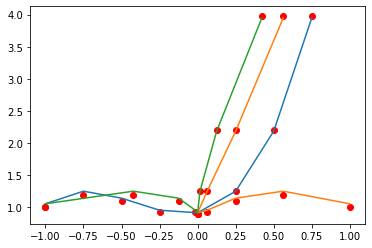

In [13]:
numx = x.numpy()
numy = y.numpy()

predict = model(x)
predict = predict.data.numpy()
plt.plot(numx, numy, 'ro', label='original data')
plt.plot(x, predict, label='fitting')

# 3.3 Classification   
二分类算法- __Logistic回归__   

## 3.3.3 Logistic distribution   
Supposed that X是连续的随机变量，服从Logistic分布是指X的积累分布函数如下：
$$ F(x) = P(X <= x) = \frac{1}{1 + e^{-(x-u)/r}}$$
u 影响中心对称点的位置, r越小，中心点附近的增长速度越快。  

Sigmoid函数，Logistic分布函数中r=1，u=0的形式： 
$$ P(x) = \frac{1}{1 + e^{-x}}$$ 

## 3.3.4 two-class Logistic regression  
对于二分类问题，Logistic回归的目标：希望找到一个区分度好的决策边界。  
假设样本的部分点A：$$ h_{w}(x) = \sum {w_i * x_i + b} > 0$$ 
   另外的样本点B：$$ h_{w}(x) = \sum {w_i * x_i + b} < 0$$ 
   属于A的，可以判定它的类别为1；属于B的，可以判定它的类别是0.  
   $$P(Y=0|x) = \frac{1}{1 + e^{w*x +b}}$$
   $$P(Y=1|x) = \frac{e^{w*x + b}}{1 + e^{w*x +b}}$$
   
### logit function:
$$logit(p) = log(\frac{p}{1-p})$$
$$log(\frac{P(Y=1|x)}{P(Y=0|x)}) = w*x + b  $$
$$log(\frac{P(Y=1|x)}{1- P(Y=1|x)}) = w*x + b $$
在Logistic回归模型中，输出Y=1的对数几率 是 输入x的线性函数。

In [14]:
import os
path = os.getcwd()
path = os.path.join(path, 'data.txt')
path

'/Users/hengshi/Documents/IFT725_myUnderstanding/Pytorch_tutorial/data.txt'

In [15]:
with open(path, 'r') as f:
    datalist = f.readlines()
    data = [i.split('\n')[0] for i in datalist]
    print(data[:4])
    data = [i.split(',') for i in data]
    print(data[:4])
    data = [(float(i[0]), float(i[1]), int(i[2])) for i in data]
    print(data[:4])

['34.62365962451697,78.0246928153624,0', '30.28671076822607,43.89499752400101,0', '35.84740876993872,72.90219802708364,0', '60.18259938620976,86.30855209546826,1']
[['34.62365962451697', '78.0246928153624', '0'], ['30.28671076822607', '43.89499752400101', '0'], ['35.84740876993872', '72.90219802708364', '0'], ['60.18259938620976', '86.30855209546826', '1']]
[(34.62365962451697, 78.0246928153624, 0), (30.28671076822607, 43.89499752400101, 0), (35.84740876993872, 72.90219802708364, 0), (60.18259938620976, 86.30855209546826, 1)]


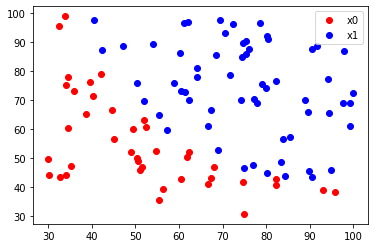

In [16]:
# plot the data
import matplotlib.pyplot as plt
x0 = list(filter(lambda x: x[-1] == 0, data))
x1 = list(filter(lambda x: x[-1] == 1, data))
# Plot the points of x0 in red
x0_a = [i[0] for i in x0]
x0_b = [i[1] for i in x0]
plt.plot(x0_a, x0_b, 'ro', label='x0')
# plot the points of x1 in blue
x1_a = [i[0] for i in x1]
x1_b = [i[1] for i in x1]
plt.plot(x1_a, x1_b, 'bo', label='x1')
plt.legend(loc='best') # set the position of legend and show the labels

### Try to look for the line to separate the two classes. 
### w0* x + w1*y + b = 0. To look for the w, b
## 定义Logistic回归模型，二分类的损失函数 和 优化方法。

In [17]:
# Try to look for the line to separate the two classes. 
# y = w * x + b. To look for the w, b
class Logistic(nn.Module):
    def __init__(self):
        super(Logistic, self).__init__()
        self.Linear = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
        
    def forward(self, x):
        out = self.Linear(x)
        out = self.sm(out)
        return out
    
model = Logistic()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [18]:
from torch.autograd import Variable

np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

for epoch in range(50000):
  
    x = Variable(x_data)
    y = Variable(y_data)
    
    predict = model(x)
    loss = criterion(predict, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%10000 == 0:
        print(loss)
    

tensor(0.3912, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3180, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2845, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2651, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2525, grad_fn=<BinaryCrossEntropyBackward>)


## get the parameters of the model
### model.linear.weight[0]


In [19]:
w0, w1 = model.Linear.weight[0]
w0 = w0.data
w1 = w1.data
b = model.Linear.bias.data[0]  ## tensor(11.7589) tensor([-11.7589])
print(w0, w1, b)

tensor(0.0990) tensor(0.0929) tensor(-11.7149)


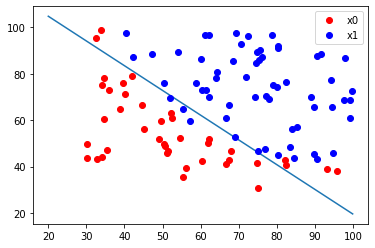

In [20]:
plotx = np.arange(20, 100, 0.1)
ploty = (-w0*plotx - b) / w1
plt.plot(plotx, ploty)
x0 = list(filter(lambda x: x[-1] == 0, data))
x1 = list(filter(lambda x: x[-1] == 1, data))
# Plot the points of x0 in red
x0_a = [i[0] for i in x0]
x0_b = [i[1] for i in x0]
plt.plot(x0_a, x0_b, 'ro', label='x0')
# plot the points of x1 in blue
x1_a = [i[0] for i in x1]
x1_b = [i[1] for i in x1]
plt.plot(x1_a, x1_b, 'bo', label='x1')
plt.legend(loc='best') 